<a href="https://colab.research.google.com/github/salilkothar/MDST/blob/main/checkpoint1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Checkpoint 1

Reminder:

- You are being evaluated for compeletion and effort in this checkpoint.
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [ ]:
df = pd.read_csv("/content/states_edu.csv")
df.head

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [33]:
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)
df.head


<bound method NDFrame.head of              PRIMARY_KEY          STATE  YEAR  ENROLL_ALL_EST  TOTAL_REVENUE  \
0           1992_ALABAMA        ALABAMA  1992             NaN      2678885.0   
1            1992_ALASKA         ALASKA  1992             NaN      1049591.0   
2           1992_ARIZONA        ARIZONA  1992             NaN      3258079.0   
3          1992_ARKANSAS       ARKANSAS  1992             NaN      1711959.0   
4        1992_CALIFORNIA     CALIFORNIA  1992             NaN     26260025.0   
...                  ...            ...   ...             ...            ...   
1710       2019_VIRGINIA       VIRGINIA  2019             NaN            NaN   
1711     2019_WASHINGTON     WASHINGTON  2019             NaN            NaN   
1712  2019_WEST_VIRGINIA  WEST_VIRGINIA  2019             NaN            NaN   
1713      2019_WISCONSIN      WISCONSIN  2019             NaN            NaN   
1714        2019_WYOMING        WYOMING  2019             NaN            NaN   

      FED

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: *ENTER YOUR CHOICE HERE*

How many years of data are logged in our dataset?

In [34]:
len(df['YEAR'].unique())

33

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [37]:
states = (df.groupby("STATE"))

#for all 4 tests

math4avg = states["AVG_MATH_4_SCORE"].mean()
math8avg = states["AVG_MATH_8_SCORE"].mean()
read4avg = states["AVG_READING_4_SCORE"].mean()
read8avg = states["AVG_READING_8_SCORE"].mean()

#computing averages (assuming outcome score is sum of all 4 scores)

ohioscore = math4avg.loc["OHIO"] + math8avg.loc["OHIO"] + read4avg.loc["OHIO"] + read8avg.loc["OHIO"]
michscore = math4avg.loc["MICHIGAN"] +math8avg.loc["MICHIGAN"] + read4avg.loc["MICHIGAN"] + read8avg.loc["MICHIGAN"]
ohioscore = ohioscore/4
michscore = michscore/4

print("Ohio's average outcome score is: ")
print(ohioscore)
print("Michigan's average outcome score is: ")
print(michscore)
print()


Ohio's average outcome score is: 
253.14659090909095
Michigan's average outcome score is: 
247.9659090909091



Find the average for your outcome score across all states in 2019

In [61]:
#grouping by year
year = df.groupby("YEAR")
#taking the means of the scores
math4 = year["AVG_MATH_4_SCORE"].mean()
math8 = year["AVG_MATH_8_SCORE"].mean()
read4 = year["AVG_READING_4_SCORE"].mean()
read8 = year["AVG_READING_8_SCORE"].mean()


#computing averages
savg2019 = math4.loc[2019] + math8.loc[2019] + read4.loc[2019] + read8.loc[2019]
savg2019=savg2019/4
print(savg2019)

250.89150943396226


Find the maximum outcome score for every state.

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [74]:
#reusing states dataframe

math4max = states["AVG_MATH_4_SCORE"].max()
math8max = states["AVG_MATH_8_SCORE"].max()
read4max = states["AVG_READING_4_SCORE"].max()
read8max = states["AVG_READING_8_SCORE"].max()

allStatesMax = pd.DataFrame()

allStatesMax["MAX_OUTCOME_SCORE"] = states["AVG_MATH_4_SCORE"].max()+states["AVG_MATH_8_SCORE"].max()+states["AVG_READING_4_SCORE"].max()+states["AVG_READING_8_SCORE"].max()
allStatesMax

,MAX_OUTCOME_SCORE
STATE,
ALABAMA,981.0
ALASKA,995.0
ARIZONA,1002.0
ARKANSAS,1000.0
CALIFORNIA,991.0
COLORADO,1037.0
CONNECTICUT,1039.0
DELAWARE,1020.0
DISTRICT_OF_COLUMBIA,968.0


<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable.

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [78]:
df['SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'] = df['SUPPORT_SERVICES_EXPENDITURE'] / df['ENROLL_ALL']
df["TOTAL_SCORE"] = df["AVG_MATH_4_SCORE"]+df["AVG_MATH_8_SCORE"]+df["AVG_READING_4_SCORE"]+df["AVG_READING_8_SCORE"]
df

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT,TOTAL_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN,1.004650,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN,2.864810,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN,1.496312,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN,1.095128,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN,1.621537,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,247.0,287.0,224.0,262.0,NaN,1020.0
1711,2019_WASHINGTON,WASHINGTON,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,240.0,286.0,220.0,266.0,NaN,1012.0
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,231.0,272.0,213.0,256.0,NaN,972.0
1713,2019_WISCONSIN,WISCONSIN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,242.0,289.0,220.0,267.0,NaN,1018.0


Feature engineering justification: Using expenditure per student column. Creating new column to include total score as the sum of both math and reading at grades 4 and 8

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

<Axes: title={'center': 'Distribution of Total Scores'}, ylabel='Frequency'>

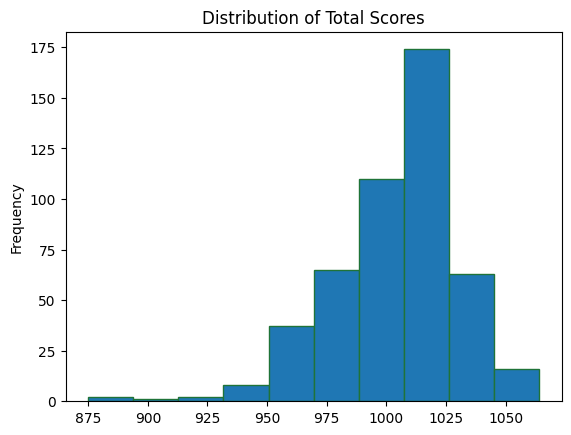

In [86]:
df.TOTAL_SCORE.plot.hist(title="Distribution of Total Scores", edgecolor=(.123,.45,.219))

Total score defines the sum of scores in both 4th and 8th grade for the state math and reading exams. This graph represents the frequency of this metric.

**Visualization 2**

Text(0.5, 1.0, 'Total Per Capita Expenditure Over Time')

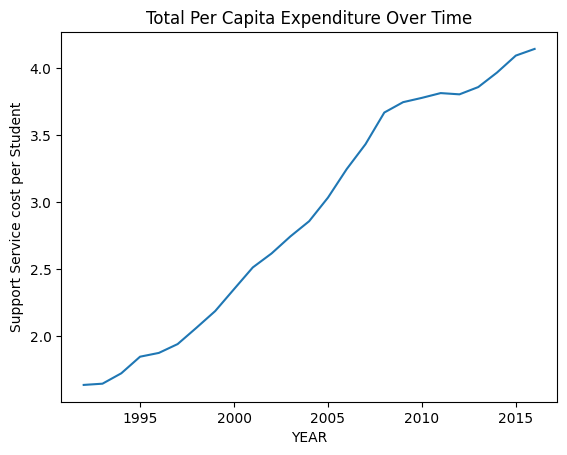

In [94]:
df.groupby('YEAR')["SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT"].mean().plot()
plt.ylabel('Support Service cost per Student')
plt.title('Total Per Capita Expenditure Over Time')

Visualization of the money spent on each child over time. This is to see if the funding that is going to each student has changed at all.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [96]:
from sklearn.model_selection import train_test_split
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL_ALL_EST', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'ENROLL_PREK', 'ENROLL_KINDER',
       'ENROLL_4', 'ENROLL_8', 'ENROLL_12', 'ENROLL_PRIMARY', 'ENROLL_HS',
       'ENROLL_ALL', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE',
       'SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT', 'TOTAL_SCORE'],
      dtype='object')

In [117]:
X = df[['ENROLL_HS','YEAR','TOTAL_SCORE']].dropna()
y =df.loc[X.index]['AVG_MATH_4_SCORE'].dropna()

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [119]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [120]:
# create your model here
model = LinearRegression()
y.fillna(y.median(), inplace=True)

In [121]:
model.fit(X_train, y_train)

LinearRegression()

In [122]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [123]:
#root mean squared error
print(np.mean((model.predict(X_test)-y_test)**2)**0.5
)
#mean squared error
np.mean(np.abs(model.predict(X_test)-y_test))

1.8911082325453374


1.5797208744423352

We have copied over the graphs that visualize the model's performance on the training and testing set.

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

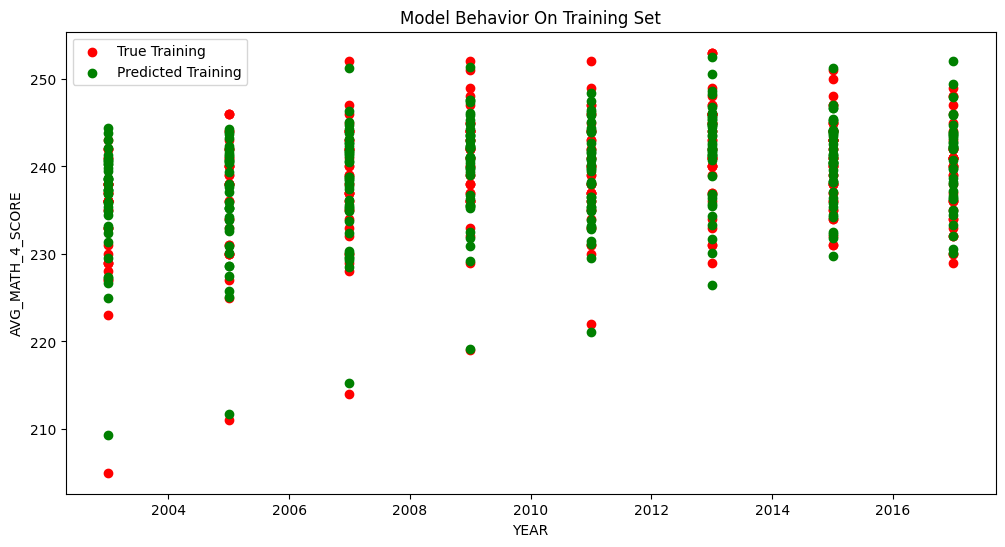

In [130]:
col_name = 'YEAR'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_4_SCORE')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

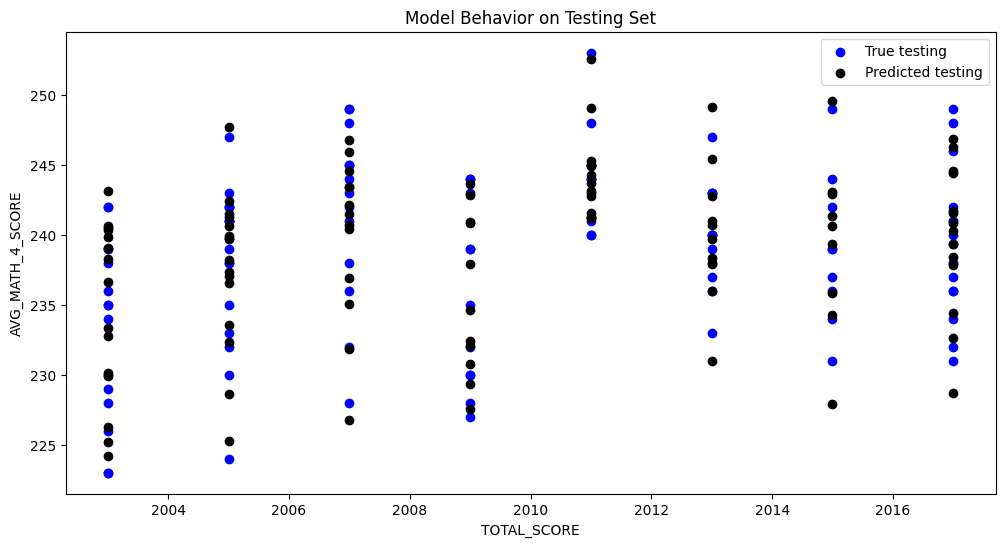

In [129]:
#col1_name = 'TOTAL_SCORE"

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel("TOTAL_SCORE")
plt.ylabel('AVG_MATH_4_SCORE')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

To predict 4th grade math scores, I used the variables for High School Enrollment, current year, and my total score metric. Given the root mean squared error and mean squared errors of 1.8911082325453374 and 1.5797208744423352, respectively, I believe that the predictions were fairly accurate especially for such high test scores (around 230). The predicted testing did vary somewhat from the true testing, but overall I believe it performed well.

A PARAGRAPH SUMMARIZING YOUR WORK, FINDINGS, AND THE PERFORMANCE OF YOUR MODEL